In [2]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [3]:
br29 = pd.read_csv("Data/br_29.csv")
br29
br29_norm = pd.read_csv("Data/br_29_norm.csv")
br29_norm
hr29_norm = pd.read_csv("Data/hr_29_norm.csv")
st29_norm = pd.read_csv("Data/st_29_norm.csv")

In [4]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## Dendrogram of 29 Day cycles

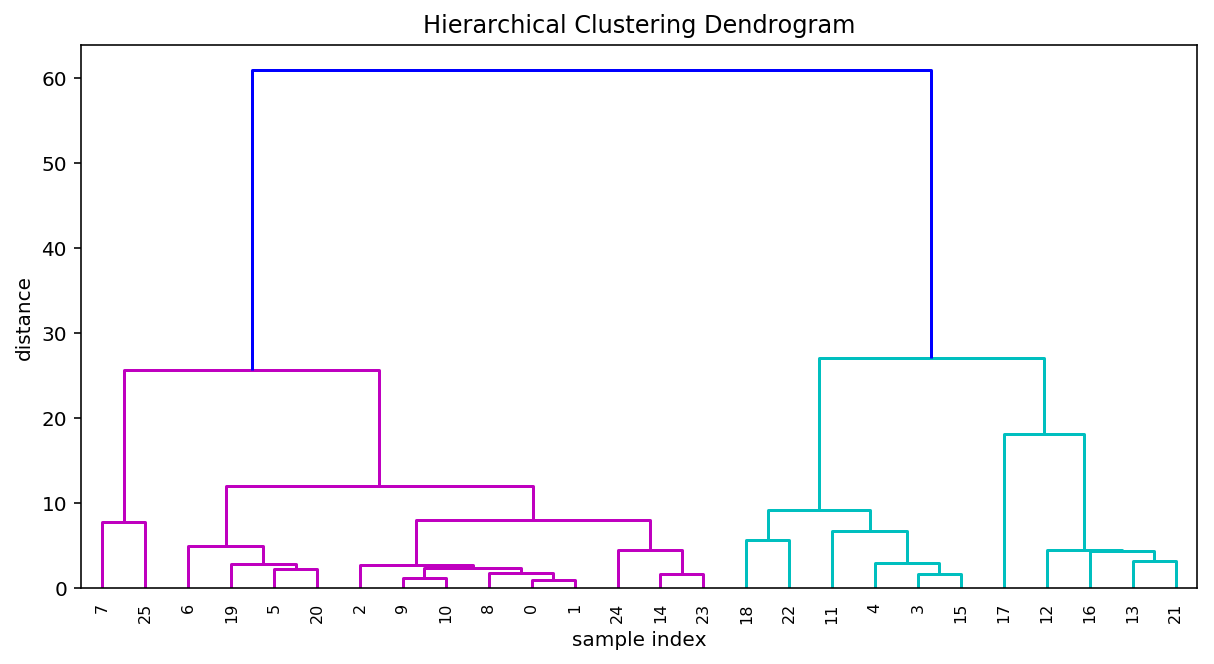

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, set_link_color_palette
# Do the clustering
Z = linkage(br29.drop("cycle_day", axis =1).T, method='ward', metric='euclidean')
set_link_color_palette(['m', 'c', 'y', 'k'])
# Plot dendogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,# font size for the x axis labels
)

plt.show()
#cutree = cut_tree(Z, n_clusters=[2,3,4,10])
#cutree

### Different distance calculation methods
#euclidean, maximum, manhattan, canberra, binary, minkowski, pearson, spearman, kendall

### different clustering methods
#ward.D, ward.D2, single, complete, average, mcquitty, median, centroid

### custom metric

In [6]:
# If you want your own metric: Here we use spearman correlation
def my_metric(x, y):
    r = stats.pearsonr(x, y)[0]
    return 1 - r # correlation to distance: range 0 to 2

### linkage calculation and dendrogram plot

In [80]:
# Do the clustering    
def plot_dendro(timeSeries, method, metric, k, feature, cycle_length):
    %matplotlib inline
    Z = linkage(timeSeries,  method=method, metric=metric)
    with plt.style.context(('bmh')):
    # Plot dendogram
        set_link_color_palette(['m', 'c', 'y', 'k'])
        d = plt.figure(figsize=(15, 7))
        plt.title(str(feature+" "+str(cycle_length)+" Days "+str(method)+" "+str(metric)+" "+str(k)))
        plt.xlabel('cycle index')
        plt.ylabel('distance')
        dendrogram(Z,
            leaf_rotation=90., # rotates the x axis labels\
            leaf_font_size=8., # font size for the x axis labels\ 
            show_contracted=True)
    return d, Z

### k clusters

criterion:
 - inconsistent : If a cluster node and all its descendants have an inconsistent value less than or equal to t then all its leaf descendants belong to the same flat cluster. When no non-singleton cluster meets this criterion, every node is assigned to its own cluster. (Default)
 
 - distance : Forms flat clusters so that the originalobservations in each flat cluster have no greater a cophenetic distance than t.
 
 - maxclust : Finds a minimum threshold r so that the cophenetic distance between any two original observations in the same flat cluster is no more than r and no more than t flat clusters are formed.
 
 - monocrit : Forms a flat cluster from a cluster node c with index i when monocrit[j] <= t.
            For example, to threshold on the maximum mean distance as computed in the inconsistency matrix R with a threshold of 0.8 do:
        MR = maxRstat(Z, R, 3)
        cluster(Z, t=0.8, criterion='monocrit', monocrit=MR)
        
 - maxclust_monocrit : Forms a flat cluster from a non-singleton cluster node c when monocrit[i] <= r for all cluster indices i below and including c. r is minimized such that no more than t flat clusters are formed. monocrit must be monotonic. 
         For example, to minimize the threshold t on maximum inconsistency values so that no more than 3 flat clusters are formed, do:
        MI = maxinconsts(Z, R)
        cluster(Z, t=3, criterion='maxclust_monocrit', monocrit=MI)

In [81]:
def plot_clustered_ts(timeSeries, k,method, metric, anim, plot = True):
    %matplotlib inline
    from scipy.cluster.hierarchy import fcluster
    import math
    import time
    
    Z = linkage(timeSeries,  method=method, metric=metric)
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')
    print(results)
    # check the results
    s = pd.Series(results)
    clusters = s.unique()
    if anim == True:
        %matplotlib
        
    fig = plt.figure(figsize = (15,10))
    for i, c in enumerate(clusters):
        
        cluster_indeces = s[s==c].index

        if plot:
            with plt.style.context(('bmh')):
                x = math.ceil(k/2)
                ax = fig.add_subplot(x,2,i+1)
                if anim == True:
                    axes = fig.add_subplot(x,2,i+1)
                    
                    for cluster_index in range(len(cluster_indeces)):
                        axes = plt.gca()
                        axes.set_ylim(-3, +3)
                        plt.plot(timeSeries.T.iloc[:,cluster_indeces[cluster_index]], marker = ".",label = cluster_indeces[cluster_index])
                        plt.draw()
                        plt.pause(0.1)
                        #plt.set_title("Cluster %d - number of entries %d" % (c, len(cluster_indeces)))
                        #plt.legend(frameon=False, loc='lower right', ncol=2)
                else:
                    for cluster_index in range(len(cluster_indeces)):
                        ax.plot(timeSeries.T.iloc[:,cluster_indeces[cluster_index]], marker = ".",label = cluster_indeces[cluster_index])
                        plt.title("Cluster %d - number of entries %d" % (c, len(cluster_indeces)))
                        plt.legend(frameon=False, loc='lower right', ncol=2)
                
        else:
            print("Cluster %d - number of entries %d" % (c, len(cluster_indeces)))

In [76]:
feature = "Heart Rate (z-score)"
cycle_length = "20 - 36"
timeSeries = hr.drop("cycle_day", axis =1).T
k = 3
method = "ward"
metric = "euclidean"
#plot_dendro(timeSeries, method, metric, k, feature, cycle_length)
plot_clustered_ts(timeSeries, k, method, metric, anim=True, plot = True)

[3 3 2 3 3 1 3 2 2 3 1 1 2 3 3 2 3 3 2 3 2 2 2 3 3 3 1 1 2 3 3 2 3 2 2 3 2
 3 2 2 3 2 1 2 2 2 1 3 2 3 3 1 2 1 3 2 3 3 3 2 2 2 1 3 3 3 1 3 3 1 3 2 2 2
 2 2 3 3 2 2 2 2 2 2 2 3 3 3 3 3 3 3 2 2 1 1 2 2 2 1 3 3 3 3 2 3 2 2 3 3 3
 3 3 3 1 1 3 2 2 2 2 2 3 3 1 2 1 3 3 3 2 2 2 1 2 3 3 3 2 2 2 2 3 2 2 3 3 3
 1 2 2 2 3 3 1 2 2 3 1 3 3 3 3 1 2 3 3 2 2 3 2 2]
Using matplotlib backend: MacOSX


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



(<matplotlib.figure.Figure at 0x112f226a0>,
 array([[  13.        ,   49.        ,    1.18795681,    2.        ],
        [  72.        ,  119.        ,    1.31092141,    2.        ],
        [  73.        ,   84.        ,    1.3743886 ,    2.        ],
        [ 146.        ,  152.        ,    1.56975289,    2.        ],
        [  78.        ,  173.        ,    1.59713389,    3.        ],
        [  28.        ,  149.        ,    1.63836657,    2.        ],
        [  25.        ,   68.        ,    1.69997251,    2.        ],
        [  44.        ,  120.        ,    1.73682246,    2.        ],
        [   3.        ,   88.        ,    1.77213272,    2.        ],
        [  54.        ,  178.        ,    1.79498188,    3.        ],
        [  56.        ,   90.        ,    1.80374808,    2.        ],
        [ 130.        ,  131.        ,    1.81635427,    2.        ],
        [  61.        ,  174.        ,    1.84383669,    3.        ],
        [  24.        ,  110.        ,    1.88

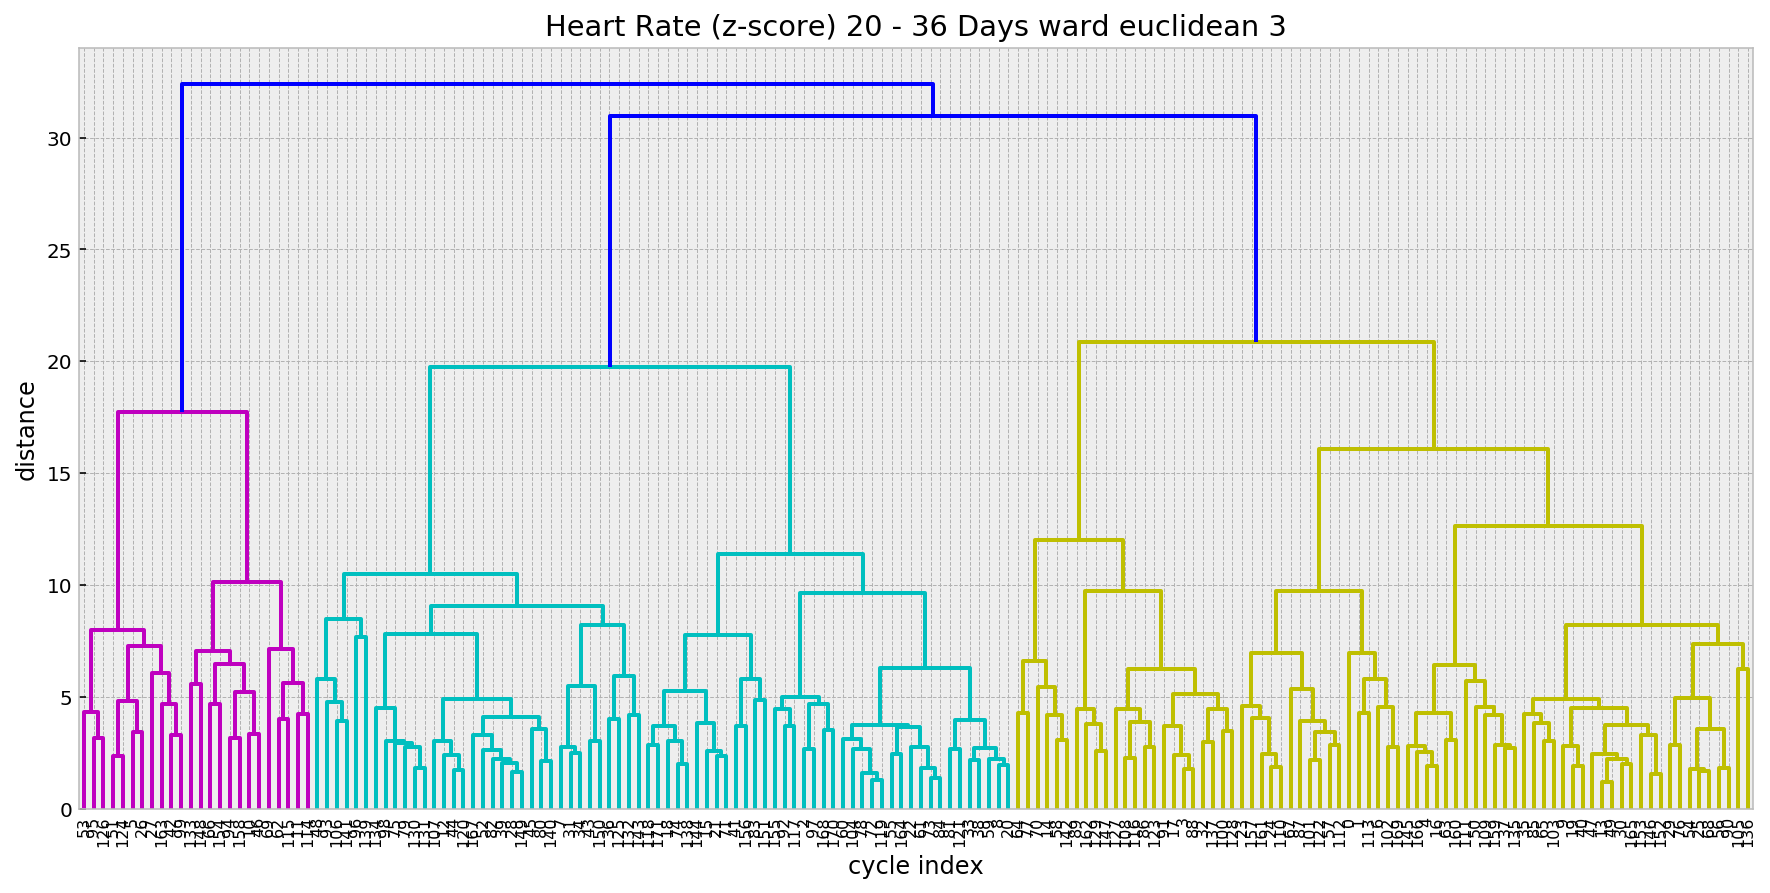

In [87]:
p = plot_dendro(timeSeries, method, metric, k, feature, cycle_length)
p

In [ ]:
### heatmap of clustered 

In [28]:
def print_dendro_cluster(timeSeries, method, metric, k, feature, cycle_length,anim = False, plot = True, save = False):
    

    # plot dendrogram
    d_plot = plot_dendro(timeSeries, method, metric, k, feature, cycle_length)
    
    # plot clustered time series
    c_plot = plot_clustered_ts(timeSeries.T, Z, k, anim= anim, plot=plot,)
    

    if save == True:
         #save figures in one pdf file
        pdf_name = str(feature)+"_"+str(cycle_length)+"_"+str(method)+"_"+str(metric)+"_"+str(k)+".pdf"
        import matplotlib.backends.backend_pdf
        pp = matplotlib.backends.backend_pdf.PdfPages(pdf_name)
        pp.savefig(c_plot, dpi = 300)
        pp.savefig(d_plot, dpi = 300)
        pp.close()


#### test function print_dendro_cluster

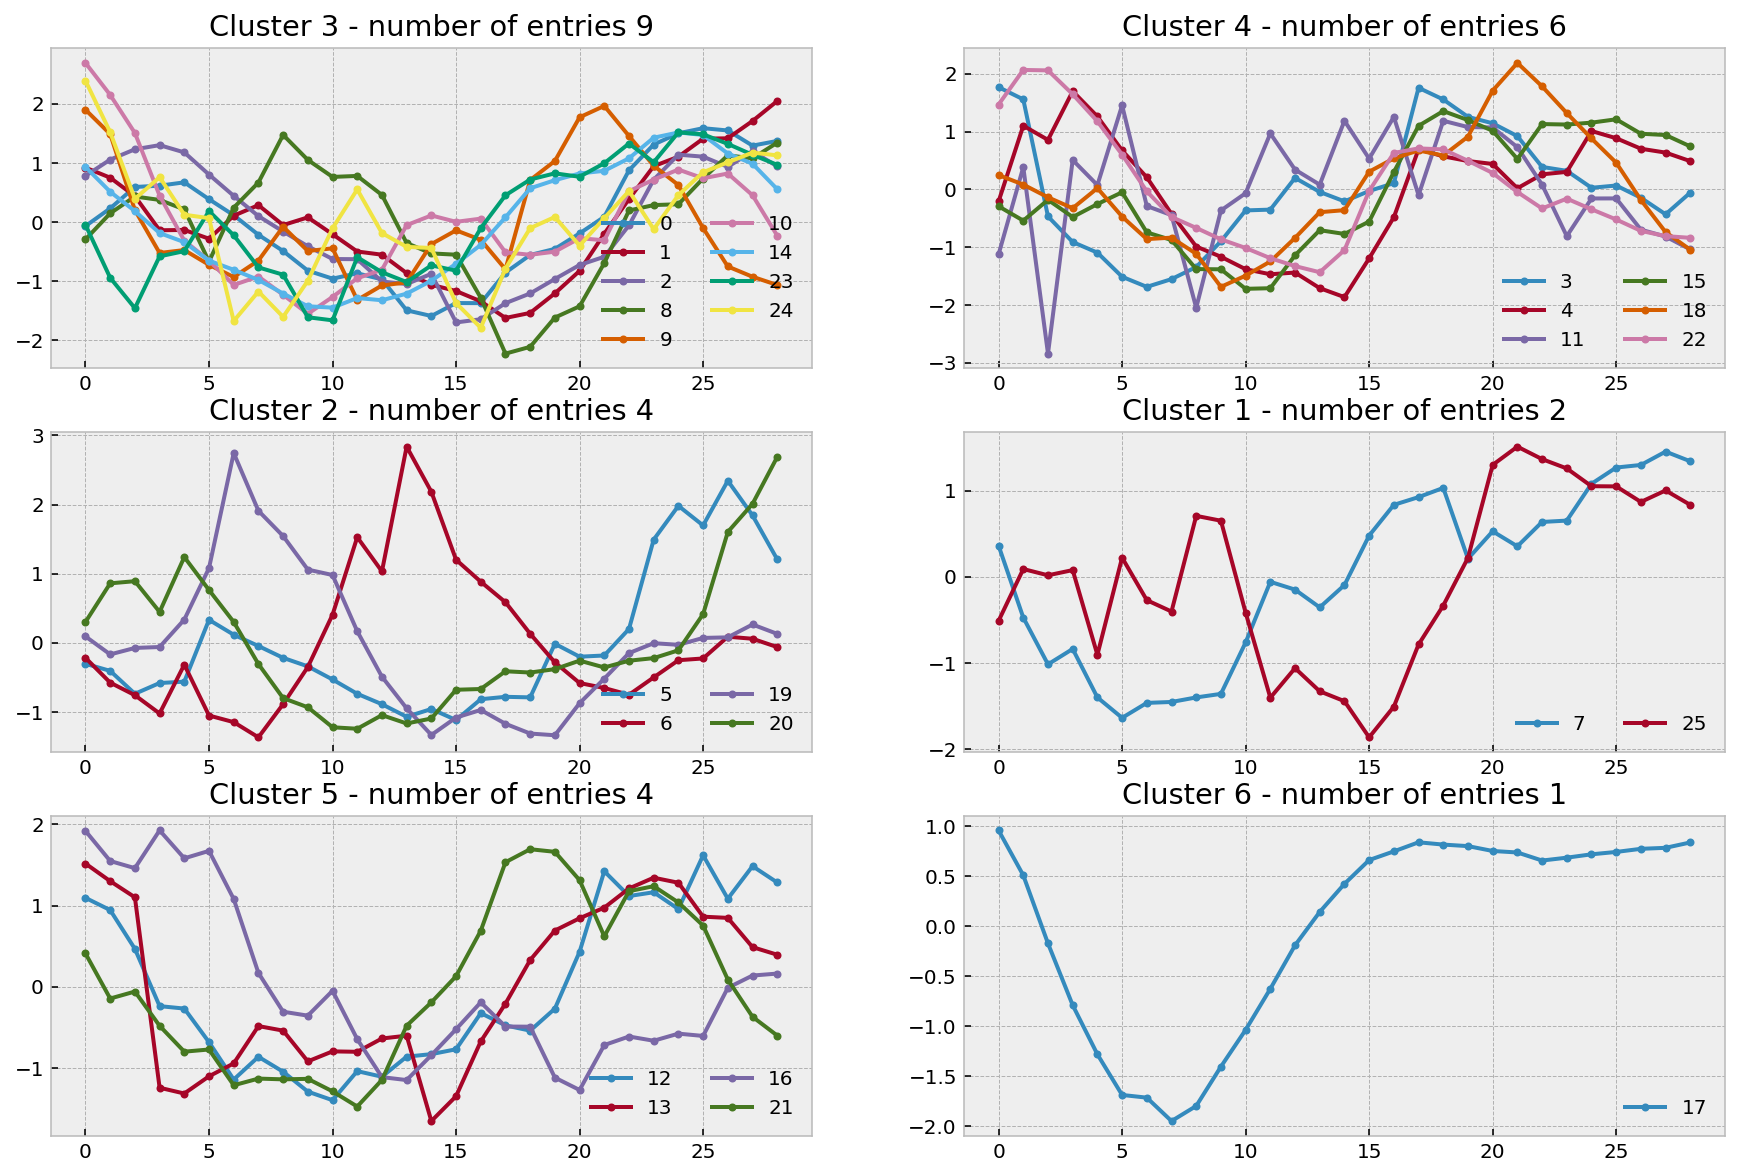

In [10]:
timeSeries = br29_norm.drop("cycle_day", axis =1)
feature = "Breathing Rate (z-score)"
cycle_length = "29"
print_dendro_cluster(timeSeries,"ward","euclidean", 6, feature, cycle_length, anim = False)

### try all combinations of clustering methods and metrics

### selected clustering methods and metrics

Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.


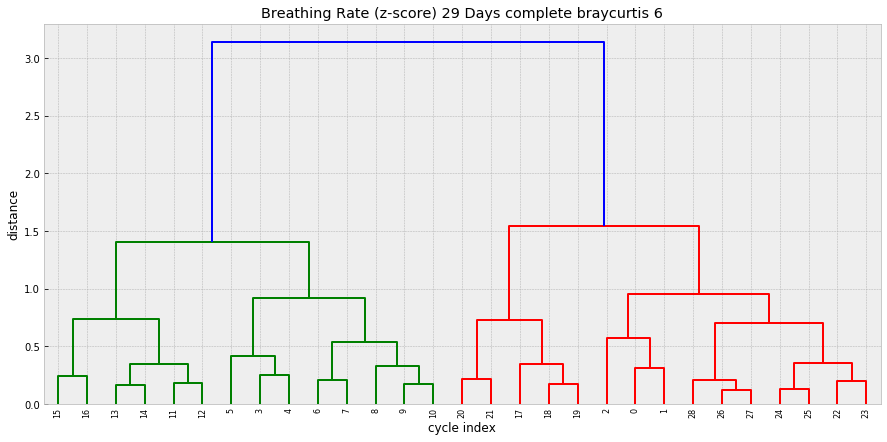

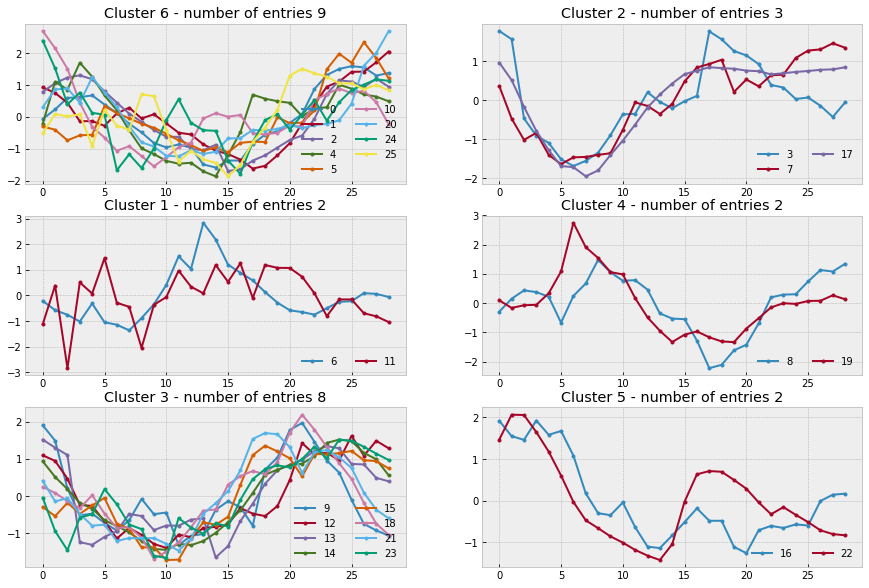

In [528]:
feature = "Breathing Rate (z-score)"
cycle_length = "29"
timeSeries = br29_norm.drop("cycle_day", axis =1)
number_clusters = [2,3,4,5,6]
methods = ["average", "ward", "complete"]
metrics = ["euclidean", "cityblock", "braycurtis"]

for method in methods:
    for metric in metrics:
        for k in number_clusters:
            try:
                 print_dendro_cluster(timeSeries, method,metric, k, feature, cycle_length)
            except:
                print("Clustering with method {} and metric {} is not possible.".format(method, metric))

Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.


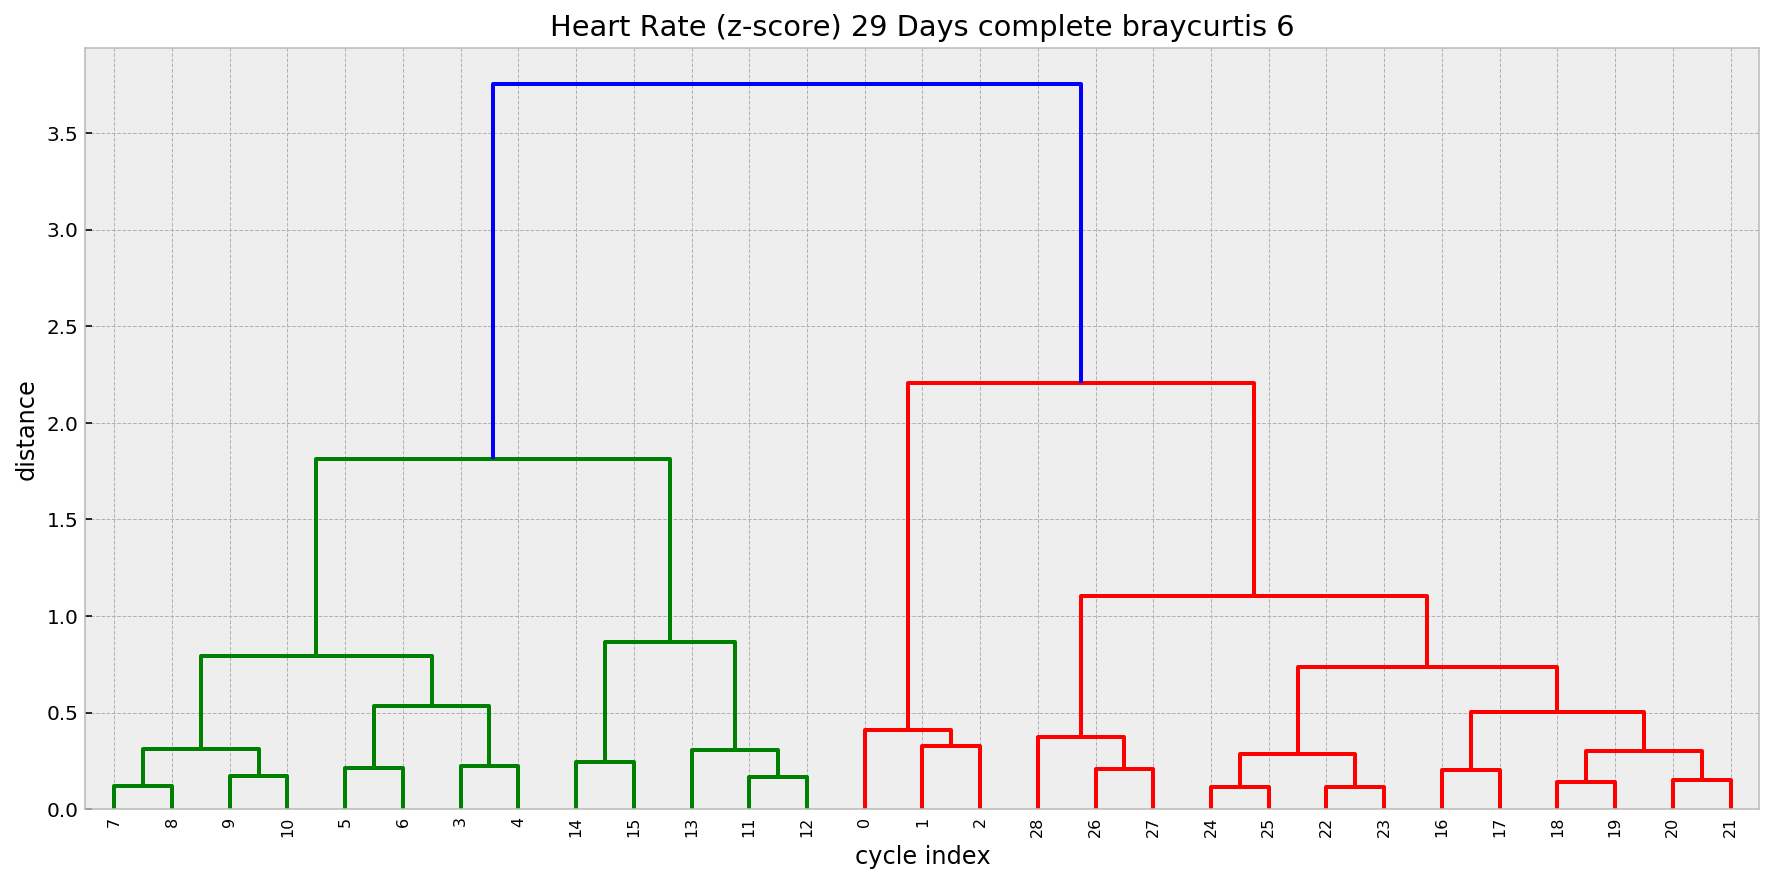

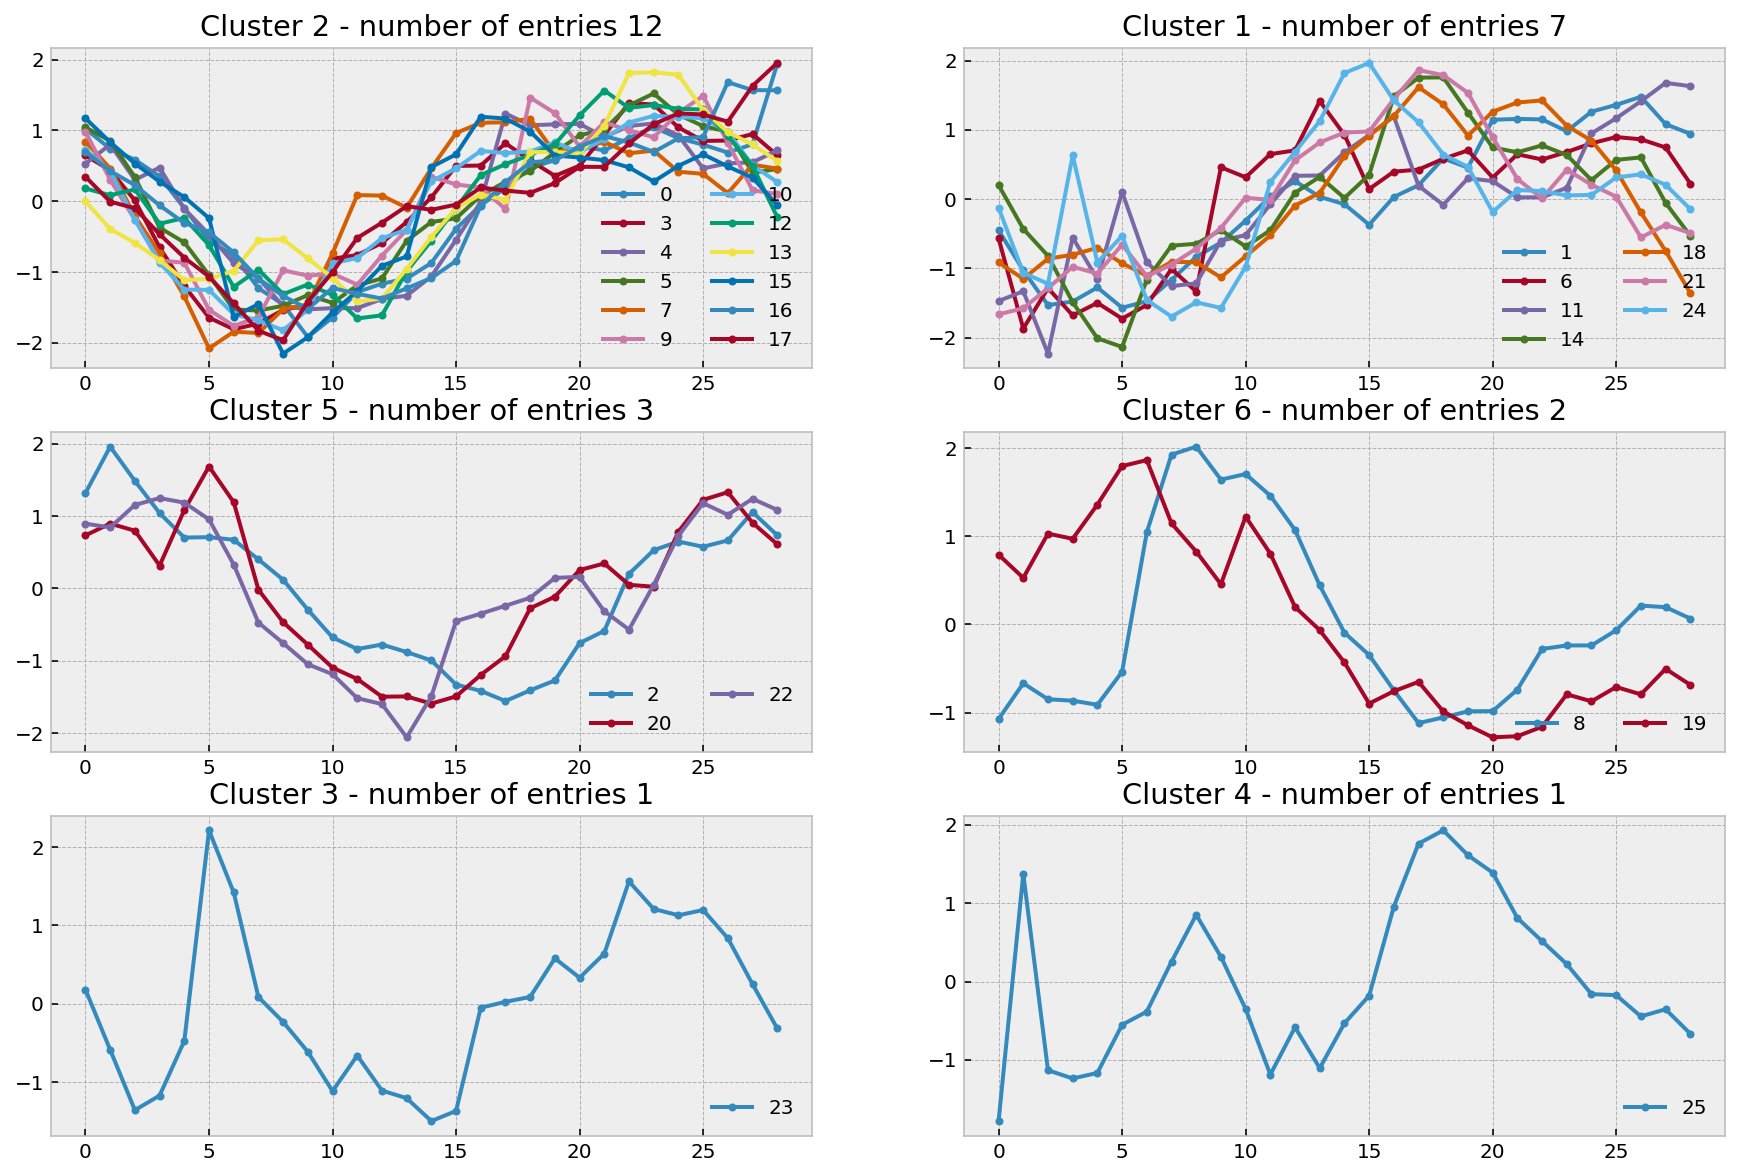

In [533]:
feature = "Heart Rate (z-score)"
cycle_length = "29"
timeSeries = hr29_norm.drop("cycle_day", axis =1)
number_clusters = [2,3,4,5,6]
methods = ["average", "ward", "complete"]
metrics = ["euclidean", "cityblock", "braycurtis"]

for method in methods:
    for metric in metrics:
        for k in number_clusters:
            try:
                 print_dendro_cluster(timeSeries, method,metric, k, feature, cycle_length)
            except:
                print("Clustering with method {} and metric {} is not possible.".format(method, metric))

Clustering with method average and metric braycurtis is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method complete and metric braycurtis is not possible.


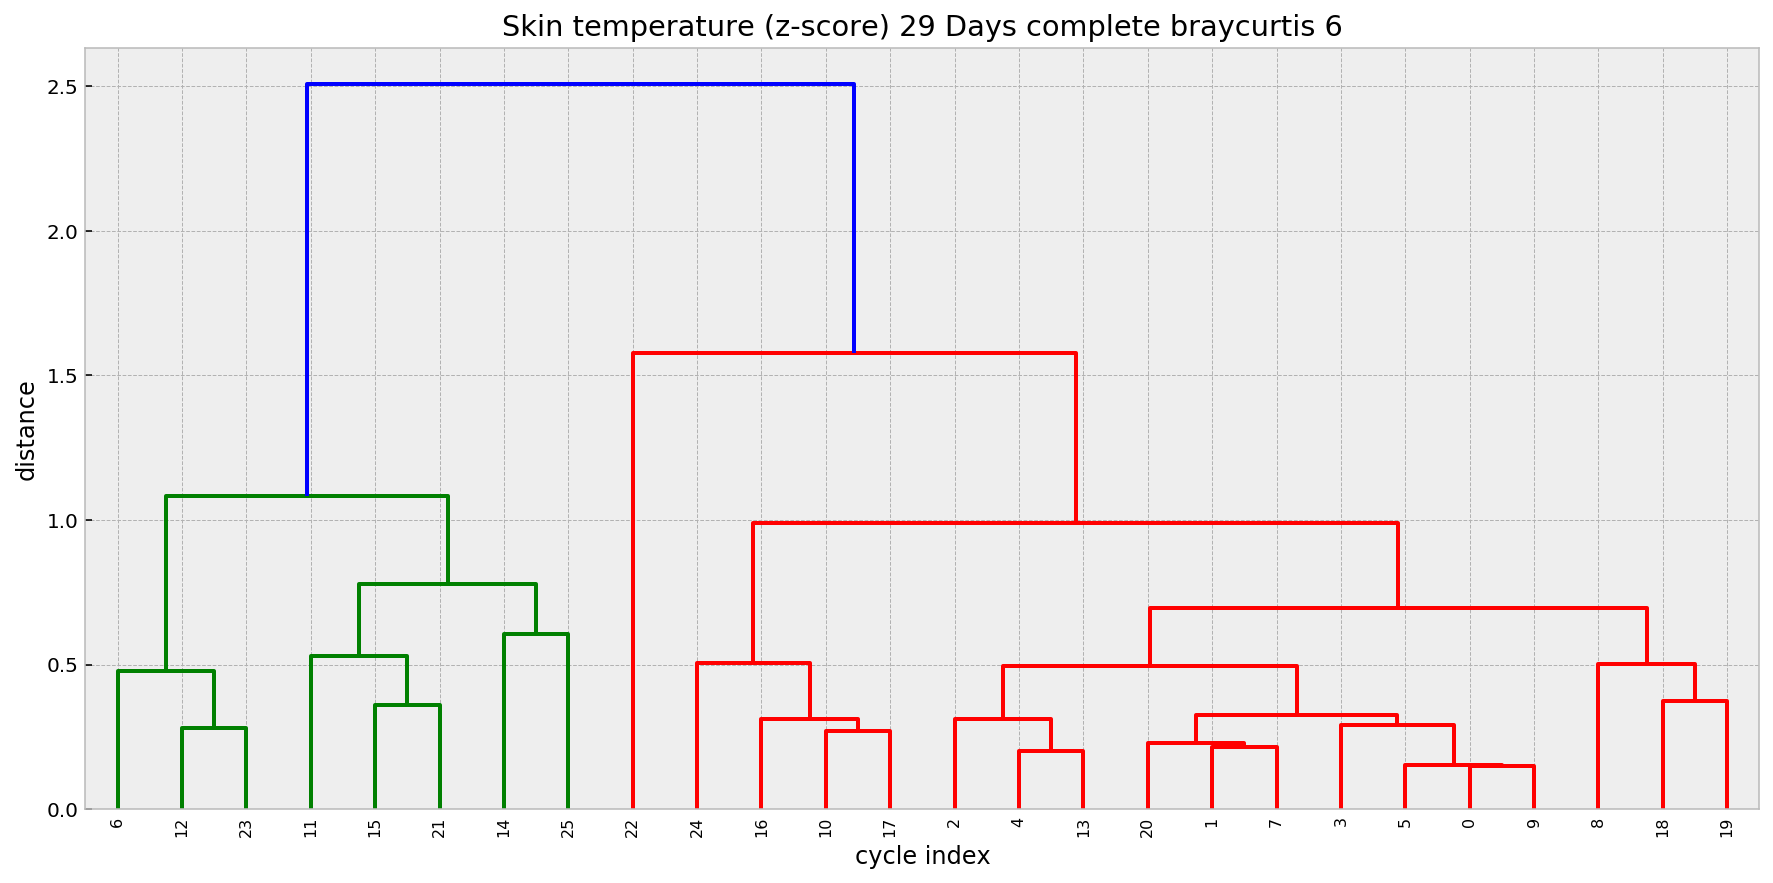

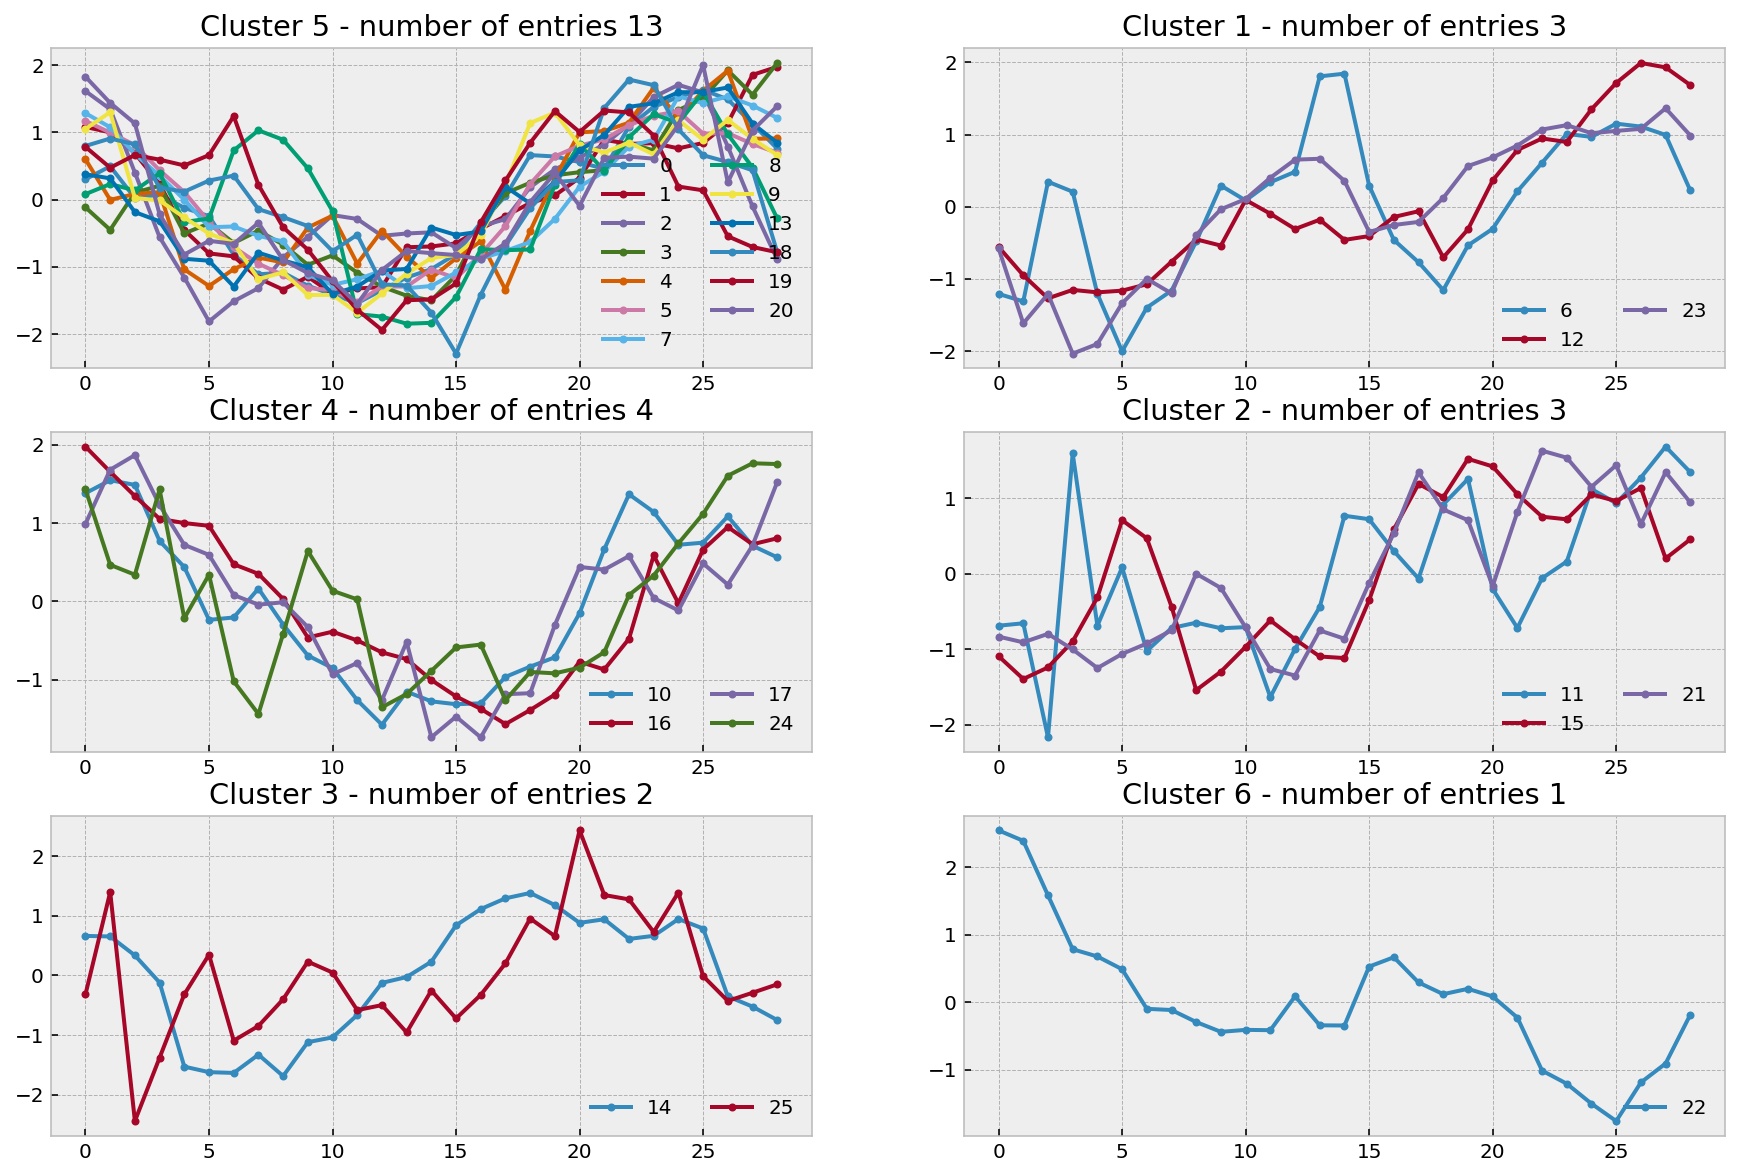

In [571]:
feature = "Skin temperature (z-score)"
cycle_length = "29"
timeSeries = st29_norm.drop("cycle_day", axis =1)
number_clusters = [2,3,4,5,6]
methods = ["average", "ward", "complete"]
metrics = ["euclidean", "cityblock", "braycurtis"]

for method in methods:
    for metric in metrics:
        for k in number_clusters:
            try:
                 print_dendro_cluster(timeSeries, method,metric, k, feature, cycle_length)
            except:
                print("Clustering with method {} and metric {} is not possible.".format(method, metric))

In [542]:
def emd_metric(x, y):
    from scipy.stats import wasserstein_distance
    d = wasserstein_distance(x,y)
    return d # correlation to distance: range 0 to 2

In [541]:
# earth movers distance
ts1 = st29_norm.drop("cycle_day", axis =1)["3"]
ts2 = st29_norm.drop("cycle_day", axis =1)["17"]
wasserstein_distance(ts1, ts2)

0.18668966765565176

Clustering with method ward and metric <function emd_metric at 0x111a71f28> is not possible.
Clustering with method ward and metric <function emd_metric at 0x111a71f28> is not possible.
Clustering with method ward and metric <function emd_metric at 0x111a71f28> is not possible.
Clustering with method ward and metric <function emd_metric at 0x111a71f28> is not possible.
Clustering with method ward and metric <function emd_metric at 0x111a71f28> is not possible.
Clustering with method complete and metric <function emd_metric at 0x111a71f28> is not possible.


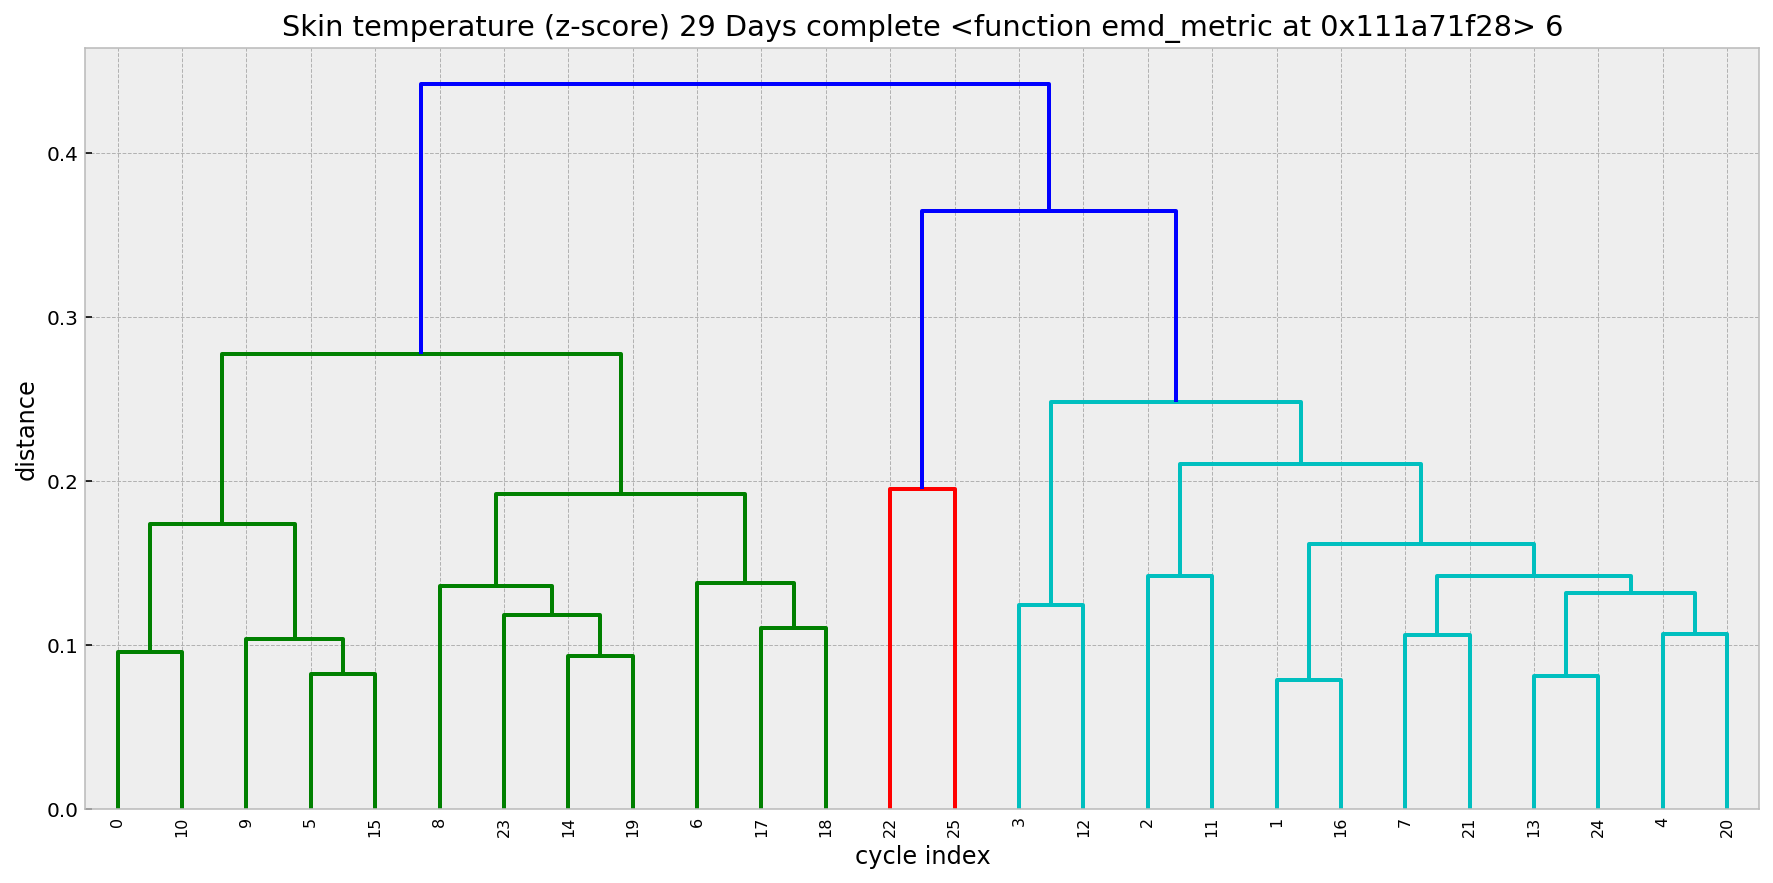

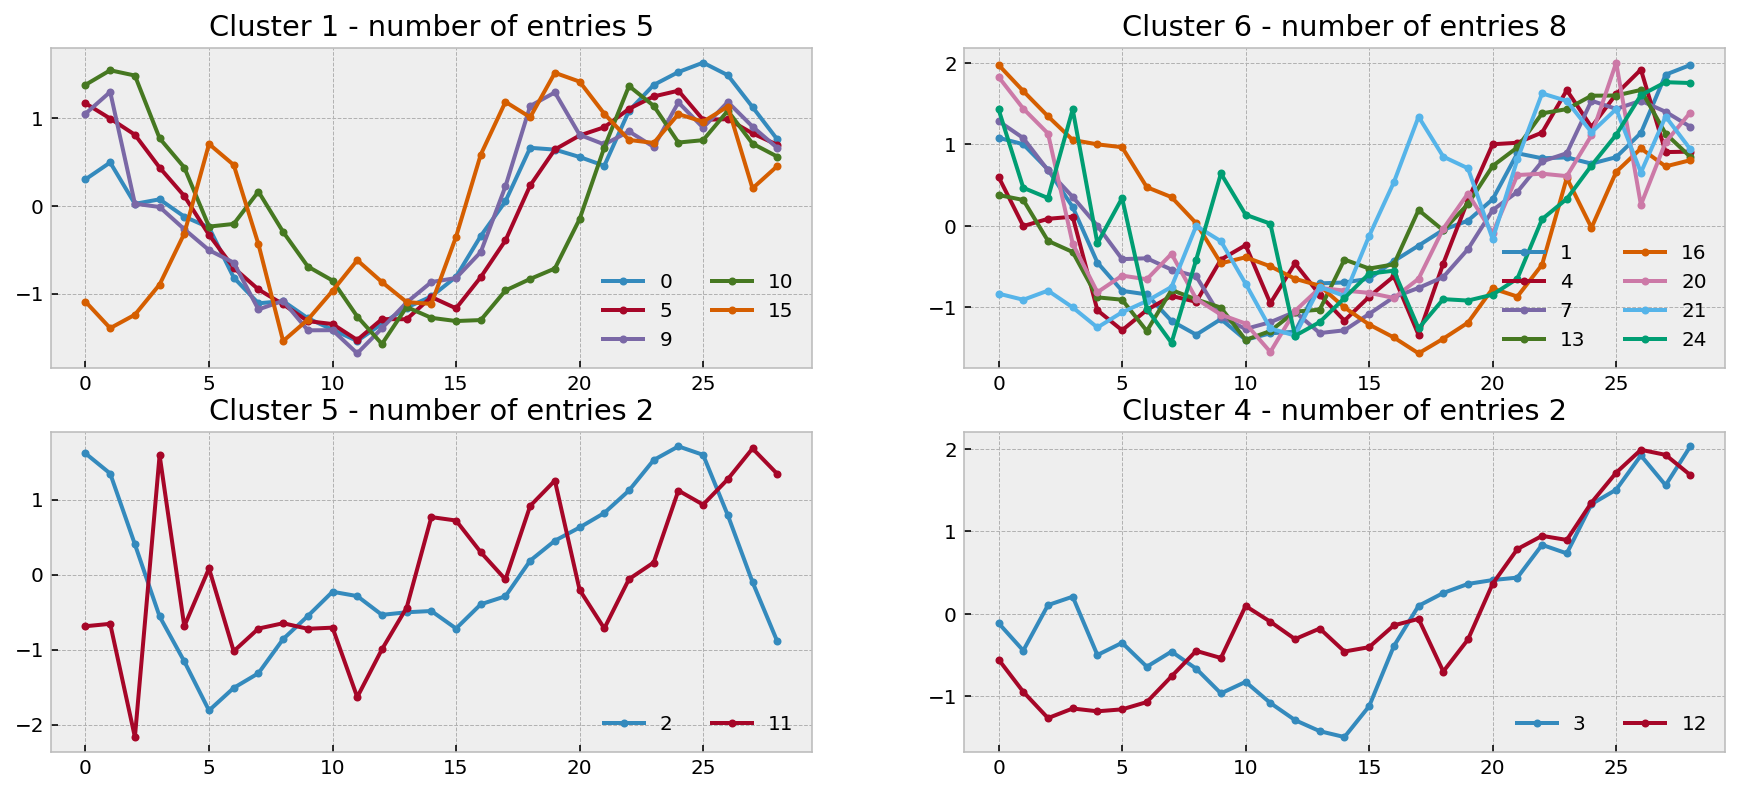

In [572]:
feature = "Skin temperature (z-score)"
cycle_length = "29"
timeSeries = st29_norm.drop("cycle_day", axis =1)
number_clusters = [2,3,4,5,6]
methods = ["average", "ward", "complete"]
metric = emd_metric

for method in methods:
        for k in number_clusters:
            try:
                 print_dendro_cluster(timeSeries, method,metric, k, feature, cycle_length)
            except:
                print("Clustering with method {} and metric {} is not possible.".format(method, metric))

# Heart Rate cycles of all regular lengths 

In [11]:
hr_na = pd.read_csv("Data/hr_na.csv")
hr = pd.read_csv("Data/hr_all_norm.csv")

ValueError: invalid literal for int() with base 10: 'ward'

Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric cityblock is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.
Clustering with method ward and metric braycurtis is not possible.


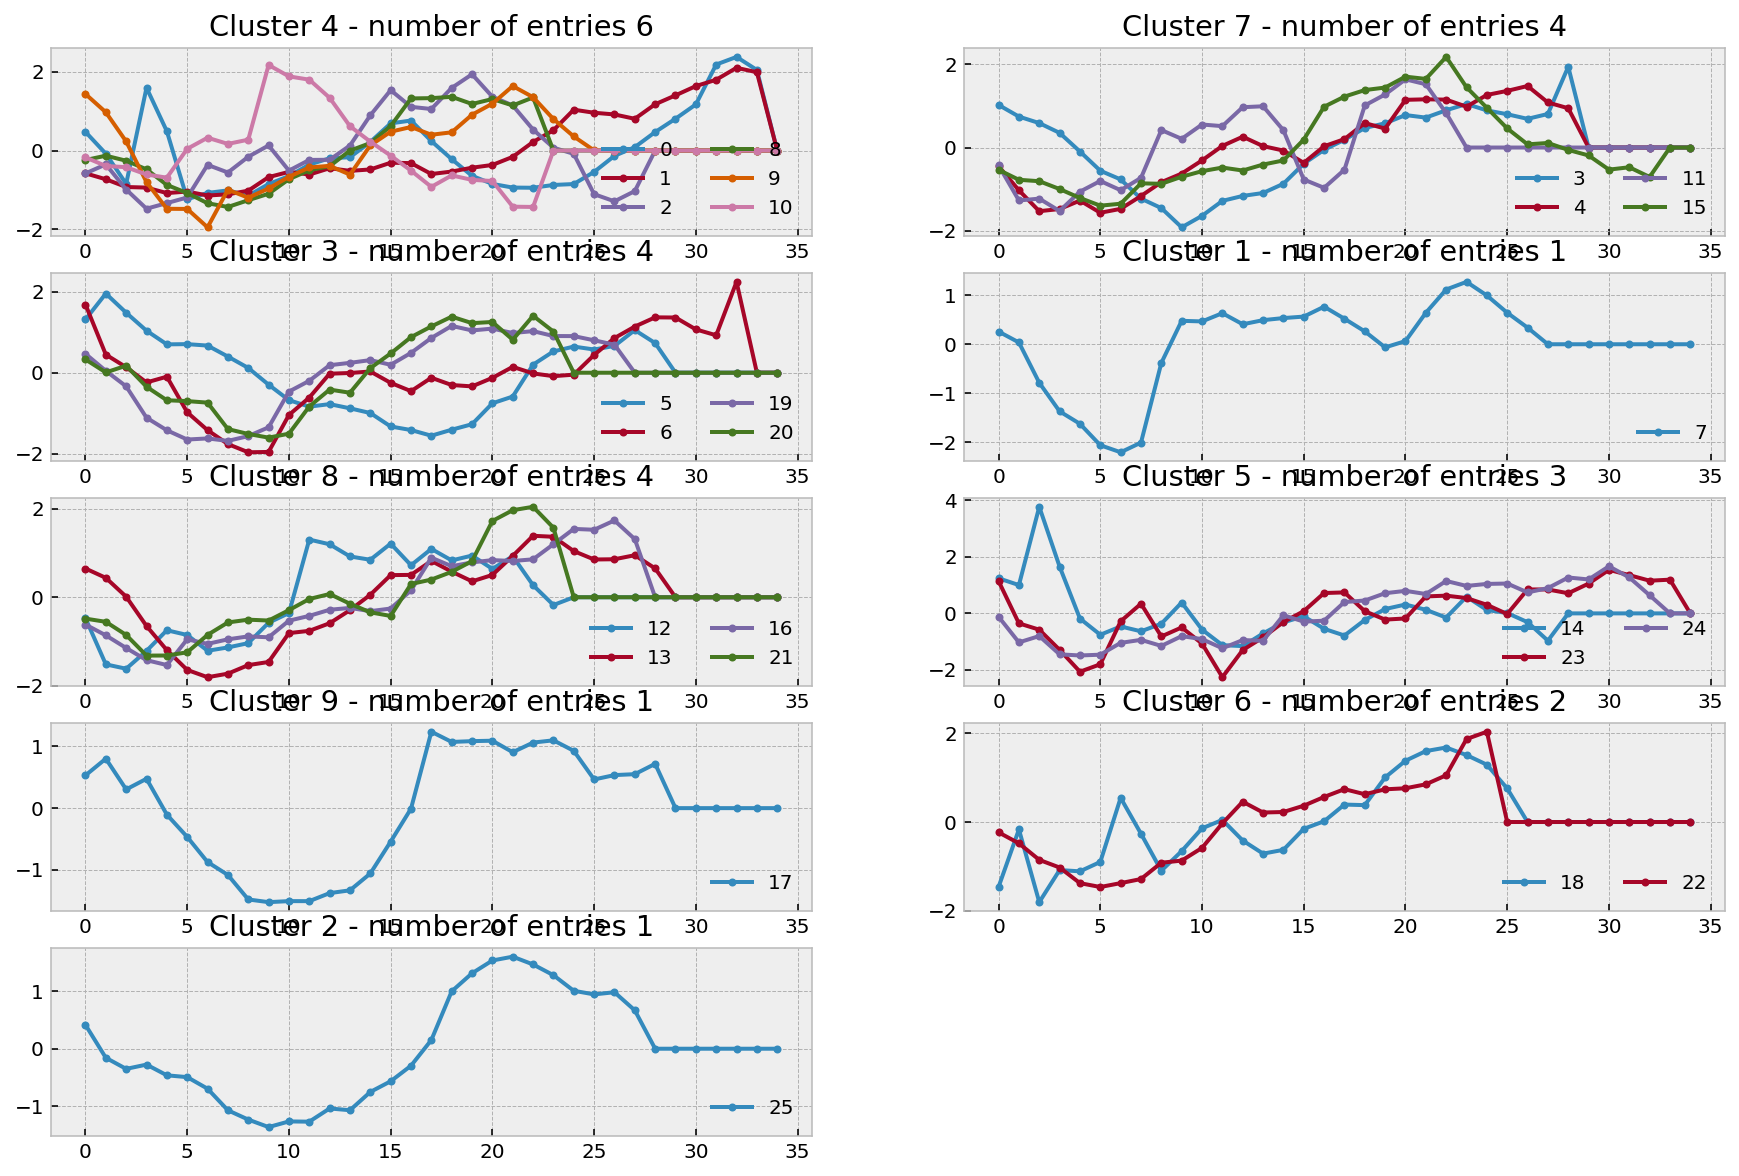

In [22]:
feature = "Heart Rate (z-score)"
cycle_length = "20 - 36"
timeSeries = hr.drop("cycle_day", axis =1)
number_clusters = [4,5,6,9]
methods = ["average", "ward", "complete"]
metrics = ["euclidean", "cityblock", "braycurtis"]

for method in methods:
    for metric in metrics:
        for k in number_clusters:
            try:
                 print_dendro_cluster(timeSeries, method,metric, k, feature, cycle_length, plot)
            except:
                print("Clustering with method {} and metric {} is not possible.".format(method, metric))